In [1]:
# imports 

import sqlite3

import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
# constant variables 

avia_companies = {'KLM': 56377143, 'AirFrance': 106062176, 'British_Airways': 18332190, 'AmericanAir': 22536055,
                  'Lufthansa': 124476322, 'AirBerlin': 26223583,
                  'AirBerlin assist': 2182373406, 'easyJet': 38676903, 'RyanAir': 1542862735, 'SingaporeAir': 253340062,
                  'Qantas': 218730857, 'EtihadAirways': 45621423,
                  'VirginAtlantic': 20626359}

# British Airways, EtihadAirways, VirginAtlantic are private companies, so no tickers of those are available
# AirFrance and KLM had a merger at 2004 same with AirBerlin and AirBerlin assist
# AirBerlin assist is not listed
# Write a regular expression for Air Berlin, RyanAir because they have matching pattern


stock = {56377143: ['AF.PA', 'AFLYY', 'AFRAF', 'AFR.F', 'AIRF-U.TI'],  # KLM
         106062176: ['AF.PA', 'AFLYY', 'AFRAF', 'AFR.F', 'AIRF-U.TI'],  # AirFrance
         22536055: ['AAL', 'A1G.DU', 'AAL.MX', 'AAL.BA'],  # AmericanAir
         124476322: ['LHA.DE', 'DLAKY', 'LHA.F', 'DLAKF', 'LHA.SG'],  # Lufthansa
         26223583: ['AB1.F', 'AB1.HA', 'AB1.MU', 'AB1.DU', 'AB1.BE', 'AB1.HM'],  # AirBerlin
         38676903: ['EZJ.L', 'ESYJY', 'EJT1.DE', 'EJTTF', 'EJT1.HA', 'EJTS.F'],  # EasyJet
         1542862735: ['RYAAY', 'RYA.IR', 'RY4C.F', 'RY4C.DE', 'RY4C.BE', 'RY4C.DU'],  # RyanAir
         253340062: ['C6L.SI', 'SINGY', 'SINGF', 'SIA1.MU', 'SIA.MU', 'SIA1.HA']}  # SingaporeAir

In [4]:
# paths

path_to_db = '/Users/alexraudvee/Desktop/TU:e/Q4Y1_data_challenge_1/dbl_tweeter.db'

### connect to the database 

In [5]:
try:
    connection = sqlite3.connect(path_to_db)
    print('Succesfuly connected to the database')

    query = """
        SELECT name FROM sqlite_master  
        WHERE type='table';
        """

    cursor = connection.cursor()
    cursor.execute(query)
    list_of_tables = cursor.fetchall()

    print('---TABLE NAMES IN DB---')
    for table_name in list_of_tables:
        print('-----------------------')
        print(table_name[0])

    print('-----------------------')
    
except sqlite3.Error as e:
    print(e)

Succesfuly connected to the database
---TABLE NAMES IN DB---
-----------------------
users
-----------------------
tweets
-----------------------
tweets_geo
-----------------------
replies
-----------------------
retweets
-----------------------
quotes
-----------------------
hashtags
-----------------------
sqlite_sequence
-----------------------
symbols
-----------------------
user_mentions
-----------------------


### get the dataframes

In [6]:
### USER
def get_users(conn):
    query = """
        SELECT *
        FROM users
    """

    df = pd.read_sql(query, conn)
    return df


In [7]:
### original tweets
def get_tweets(conn):
    query = """
        SELECT *
        FROM tweets
    """

    df = pd.read_sql(query, conn)
    return df


In [8]:
### replies
def get_tweets_geo(conn):
    query = """
        SELECT *
        FROM tweets_geo
    """

    df = pd.read_sql(query, conn)
    return df


In [9]:
### tweets with quotes 
def get_replies(conn):
    query = """
        SELECT *
        FROM replies
    """

    df = pd.read_sql(query, conn)
    return df


In [10]:
### retweets 
def get_retweets(conn):
    query = """
        SELECT *
        FROM retweets
    """

    df = pd.read_sql(query, conn)
    return df

In [11]:
def get_quotes(conn):
    query = """
        SELECT *
        FROM quotes
    """

    df = pd.read_sql(query, conn)
    return df

In [12]:
def get_hashtags(conn):
    query = """
        SELECT *
        FROM hashtags
    """

    df = pd.read_sql(query, conn)
    return df

In [13]:
def get_symbols(conn):
    query = """
        SELECT *
        FROM symbols
    """

    df = pd.read_sql(query, conn)
    return df

In [14]:
def get_sqlite_sequence(conn):
    query = """
        SELECT *
        FROM sqlite_sequence
    """

    df = pd.read_sql(query, conn)
    return df

In [15]:
def get_user_mentions(conn):
    query = """
        SELECT *
        FROM user_mentions
    """

    df = pd.read_sql(query, conn)
    return df

In [16]:
users_df = get_users(connection)
tweets_df = get_tweets(connection)
tweets_geo_df = get_tweets_geo(connection)
replies_df = get_replies(connection)
retweets_df = get_retweets(connection)
quotes_df = get_quotes(connection)
hashtags_df = get_hashtags(connection)
symbols_df = get_symbols(connection)
user_mentions_df = get_user_mentions(connection)
sqlite_sequence_df = get_sqlite_sequence(connection)

## Convert the timestamps in datetime, year, month and day of year

In [27]:
### original tweets dataframe

tweets_df['timestamp'] = tweets_df[['timestamp_ms']].astype(int)

tweets_df['year'] = pd.to_datetime(tweets_df['timestamp'],unit='ms').dt.year
tweets_df['month'] = pd.to_datetime(tweets_df['timestamp'],unit='ms').dt.month
tweets_df['day'] = pd.to_datetime(tweets_df['timestamp'],unit='ms').dt.day
tweets_df['day_of_year'] = pd.to_datetime(tweets_df['timestamp'],unit='ms').dt.day_of_year
tweets_df['datetime'] = pd.to_datetime(tweets_df['timestamp'], unit='ms')

# del tweets_df['timestamp']
# del tweets_df['timestamp_ms']

tweets_df.head()

,tweet_id,user_id,text,lang,tweet_type,year,month,day,day_of_year,datetime
0,1131172858951024641,393374091,La ruta de easyJet entre Londres y Menorca tra...,es,original,2019,5,22,142,2019-05-22 12:20:00.406
1,1131172864147808257,3420691215,@goody_tracy Here’s a list of some of @JonesDa...,en,retweet,2019,5,22,142,2019-05-22 12:20:01.645
2,1131172867985485824,394376606,@British_Airways,und,reply,2019,5,22,142,2019-05-22 12:20:02.560
3,1131172909463027720,36488556,Nice change by @AmericanAir. Bikes now pay sta...,en,retweet,2019,5,22,142,2019-05-22 12:20:12.449
4,1131172975682605058,14193348,BREAKING:-\nKLM to fly 3x weekly btw @BLRAirpo...,en,retweet,2019,5,22,142,2019-05-22 12:20:28.237


## Number of tweets per language 

In [28]:
lang_popularity_df = tweets_df.groupby('lang').count()[['tweet_id']].sort_values('tweet_id', ascending=False).head()

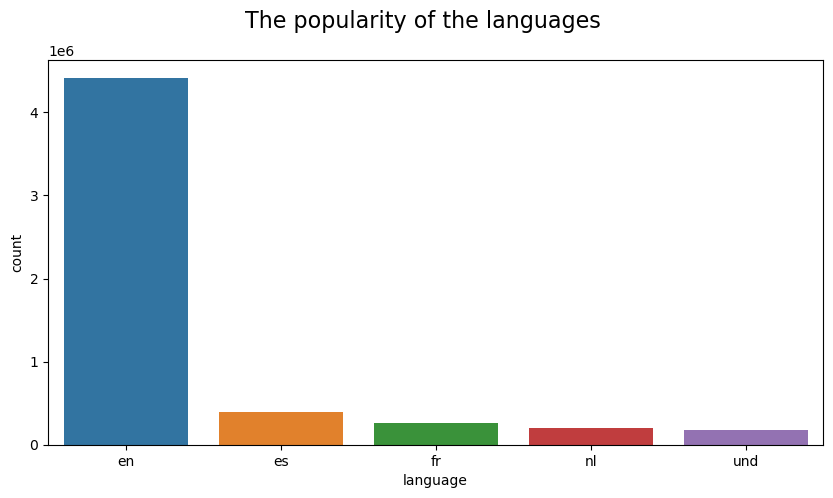

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,5))
sns.barplot(data=lang_popularity_df.reset_index(), x='lang', y='tweet_id', ax=ax)
ax.set_ylabel('count')
ax.set_xlabel('language')
fig.suptitle('The popularity of the languages', size=16);

# fig.get_figure().savefig('the_popularity_of_languages.png')

## Number of tweets that was sent to the company

In [30]:
avia_names = list(avia_companies.values())

replies_to_avia_companies_df = replies_df.loc[replies_df['reply_to_user_id'].apply(lambda x: any(x == avia_name for avia_name in avia_names))]


In [31]:
def company_naming(id):
    if id == 56377143:
       return 'KLM'
    elif id == 18332190:
       return 'British_Airways'
    elif id == 106062176:
       return 'AirFrance'
    elif id == 22536055:
       return 'AmericanAir'
    elif id == 124476322:
       return 'Lufthansa'
    elif id == 26223583:
       return 'AirBerlin'
    elif id == 2182373406:
       return 'AirBerlin assist'
    elif id == 38676903:
       return 'easyJet'
    elif id == 1542862735:
       return 'RyanAir'
    elif id == 253340062:
       return 'SingaporeAir'
    elif id == 218730857:
       return 'Qantas'
    elif id == 45621423:
       return 'EtihadAirways'
    elif id == 20626359:
       return 'VirginAtlantic'
    else:
       return None
    

replies_to_avia_companies_df['company_name'] = replies_to_avia_companies_df['reply_to_user_id'].apply(lambda row: company_naming(row))

replies_to_avia_companies_df

/var/folders/22/gxvfn3cx2_v64ngzhq52h2180000gn/T/ipykernel_52097/1901674939.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replies_to_avia_companies_df['company_name'] = replies_to_avia_companies_df['reply_to_user_id'].apply(lambda row: company_naming(row))


,reply_id,reply_to_status_id,reply_to_user_id,company_name
1,1131173038194606081,1131101346801836032,38676903,easyJet
7,1131173344731115520,1131111775674482690,22536055,AmericanAir
16,1131173742405660674,1106442403051982848,22536055,AmericanAir
17,1131173747191369729,1131087622661726208,38676903,easyJet
24,1131174183814258688,1131124649599918081,18332190,British_Airways
...,...,...,...,...
1788017,1244696138512556033,1244542697366532096,38676903,easyJet
1788020,1244696213552758787,1244683000195022855,38676903,easyJet
1788023,1244696257781805056,1244553548668579852,38676903,easyJet
1788026,1244696298638450696,1244663027452071936,38676903,easyJet


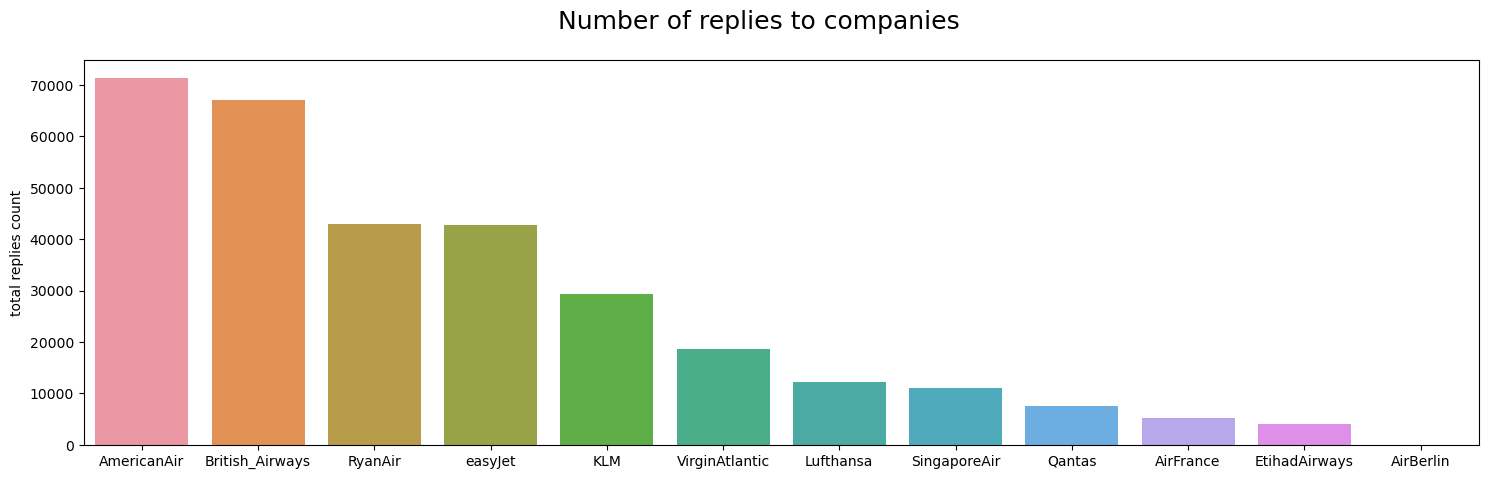

In [32]:
replies_to_avia_companies_plot = replies_to_avia_companies_df.groupby('company_name').count()[['reply_id']].sort_values('reply_id', ascending=False).reset_index()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,5))
sns.barplot(data=replies_to_avia_companies_plot, ax=ax, x='company_name', y='reply_id')
ax.set_ylabel('total replies count')
ax.set_xlabel(' ')
fig.suptitle('Number of replies to companies', size=18);

# fig.get_figure().savefig('number_of_replies_to_companies.png')

### How the amount replies to both easyjet and britishairways has changed over the year 

In [33]:
replies_to_easyjet_and_britishairways_df = replies_to_avia_companies_df[(replies_to_avia_companies_df['reply_to_user_id'] == 18332190) | (replies_to_avia_companies_df['reply_to_user_id'] == 38676903)]
replies_to_easyjet_and_britishairways_df.rename(columns={'reply_id':'tweet_id'}, inplace=True)

replies_to_easyjet_and_britishairways_time_df = pd.merge(replies_to_easyjet_and_britishairways_df, tweets_df, on="tweet_id")

/var/folders/22/gxvfn3cx2_v64ngzhq52h2180000gn/T/ipykernel_52097/2720119440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replies_to_easyjet_and_britishairways_df.rename(columns={'reply_id':'tweet_id'}, inplace=True)


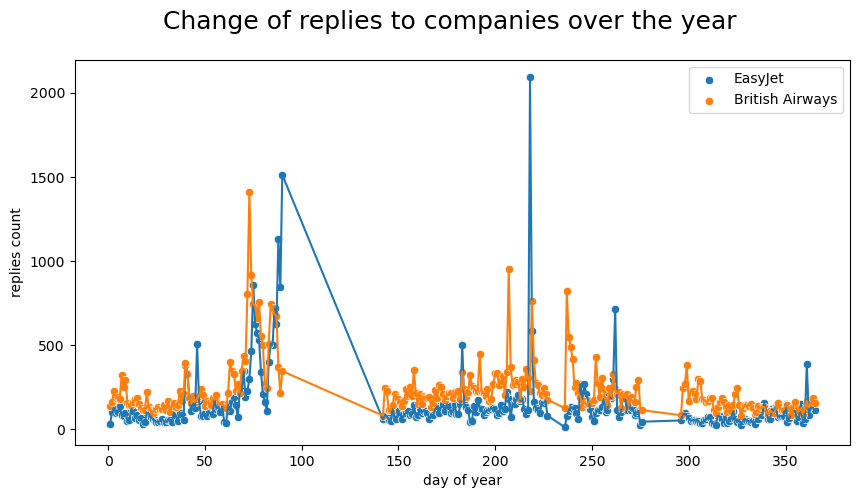

In [34]:
replies_to_easyjet_and_britishairways_plot_easyJet_df = replies_to_easyjet_and_britishairways_time_df[['tweet_id', 'company_name', 'year', 'month', 'day', 'day_of_year']][replies_to_easyjet_and_britishairways_time_df['company_name'] == 'easyJet'].groupby('day_of_year').count()
replies_to_easyjet_and_britishairways_plot_BritishAirways_df = replies_to_easyjet_and_britishairways_time_df[['tweet_id', 'company_name', 'year', 'month', 'day', 'day_of_year']][replies_to_easyjet_and_britishairways_time_df['company_name'] == 'British_Airways'].groupby('day_of_year').count()


replies_to_easyjet_and_britishairways_plot_easyJet_df
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,5))
sns.scatterplot(data=replies_to_easyjet_and_britishairways_plot_easyJet_df.reset_index()[['tweet_id', 'day_of_year']], y='tweet_id', x='day_of_year', ax=ax)
sns.scatterplot(data=replies_to_easyjet_and_britishairways_plot_BritishAirways_df.reset_index()[['tweet_id', 'day_of_year']], y='tweet_id', x='day_of_year', ax=ax)
sns.lineplot(data=replies_to_easyjet_and_britishairways_plot_easyJet_df.reset_index()[['tweet_id', 'day_of_year']], y='tweet_id', x='day_of_year', ax=ax)
sns.lineplot(data=replies_to_easyjet_and_britishairways_plot_BritishAirways_df.reset_index()[['tweet_id', 'day_of_year']], y='tweet_id', x='day_of_year', ax=ax)

ax.legend(['EasyJet', 'British Airways'])
ax.set_ylabel('replies count')
ax.set_xlabel('day of year')
fig.suptitle('Change of replies to companies over the year', size=18);

# fig.get_figure().savefig('change_of_replies_to_companies_over_the_year.png')

### Activity in tweeter between EasyJet and British Airways over the year

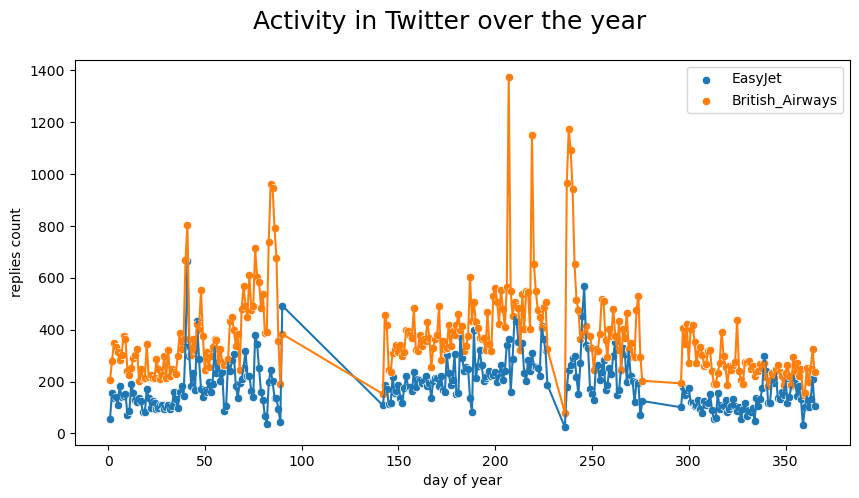

In [35]:
tweets_from_easyjet =  tweets_df[(tweets_df['user_id'] == 38676903)].groupby('day_of_year').count()
tweets_from_britishairlines = tweets_df[(tweets_df['user_id'] == 18332190)].groupby('day_of_year').count()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
sns.scatterplot(data=tweets_from_easyjet.reset_index(), ax=ax, x='day_of_year', y='tweet_id')
sns.scatterplot(data=tweets_from_britishairlines.reset_index(), ax=ax, x='day_of_year', y='tweet_id')
sns.lineplot(data=tweets_from_easyjet.reset_index(), ax=ax, x='day_of_year', y='tweet_id')
sns.lineplot(data=tweets_from_britishairlines.reset_index(), ax=ax, x='day_of_year', y='tweet_id')

ax.legend(['EasyJet', 'British_Airways'])

ax.set_ylabel('replies count')
ax.set_xlabel('day of year')
fig.suptitle('Activity in Twitter over the year', size=18);

# fig.get_figure().savefig('activity_in_twitter_over_the_year.png')

# Sprint 2
### construct the dataframe with text for sentiment analysis

In [43]:
text_all_df = tweets_df[['tweet_id', 'user_id', 'text', 'lang', 'tweet_type', 'datetime']]

In [44]:
replies_df.rename(columns={'reply_id':'tweet_id'}, inplace=True)

text_replies_df = pd.merge(replies_df, tweets_df, on='tweet_id')

### Get rid of twitts with just mentioning in the text column

In [45]:
text_replies_df = text_replies_df[text_replies_df['lang'] != 'und']

In [46]:
text_all_df = text_all_df[text_all_df['lang'] != 'und']

In [47]:
text_replies_df

,tweet_id,reply_to_status_id,reply_to_user_id,user_id,text,lang,tweet_type,year,month,day,day_of_year,datetime
1,1131173038194606081,1131101346801836032,38676903,19610469,@easyJet It is impossible to get in contact wi...,en,reply,2019,5,22,142,2019-05-22 12:20:43.141
3,1131173142414712832,1131166003373723648,210981687,210981687,And had to pay extra £50 because bag wouldnt f...,en,reply,2019,5,22,142,2019-05-22 12:21:07.989
4,1131173207858470913,1130838586281156611,399986728,288109185,@PeripateNic @VirginAtlantic Where are you fly...,en,reply,2019,5,22,142,2019-05-22 12:21:23.592
6,1131173318269259776,1131114635661324291,2886658179,1582838545,@DabongaCom @Ryanair Anywhere nice guys ?,en,reply,2019,5,22,142,2019-05-22 12:21:49.916
7,1131173344731115520,1131111775674482690,22536055,814961064051961861,@AmericanAir Do business class passengers rece...,en,reply,2019,5,22,142,2019-05-22 12:21:56.225
...,...,...,...,...,...,...,...,...,...,...,...,...
1788033,1244696469233229826,1244696106124087296,2792934357,1917516697,@Sunshine_1601 Yeah. :)\nOnly thing I had an ...,en,reply,2020,3,30,90,2020-03-30 18:42:18.264
1788034,1244696491580628993,1244344799647449089,806967414193868800,2774375013,@adnansaleemiX @qatarairways @emirates @easyJe...,en,reply,2020,3,30,90,2020-03-30 18:42:23.592
1788036,1244696513437032453,1244696469233229826,1917516697,1917516697,@Sunshine_1601 @KLM *paid,en,reply,2020,3,30,90,2020-03-30 18:42:28.803
1788037,1244696641401163776,1244677304598609923,396021583,832964639436701696,"@Boyde11 @VirginAtlantic Get your facts right,...",en,reply,2020,3,30,90,2020-03-30 18:42:59.312


In [48]:
text_all_df

,tweet_id,user_id,text,lang,tweet_type,datetime
0,1131172858951024641,393374091,La ruta de easyJet entre Londres y Menorca tra...,es,original,2019-05-22 12:20:00.406
1,1131172864147808257,3420691215,@goody_tracy Here’s a list of some of @JonesDa...,en,retweet,2019-05-22 12:20:01.645
3,1131172909463027720,36488556,Nice change by @AmericanAir. Bikes now pay sta...,en,retweet,2019-05-22 12:20:12.449
4,1131172975682605058,14193348,BREAKING:-\nKLM to fly 3x weekly btw @BLRAirpo...,en,retweet,2019-05-22 12:20:28.237
5,1131173010235375617,1025334292166127617,EasyJet was on a slippery slope when it charge...,en,original,2019-05-22 12:20:36.475
...,...,...,...,...,...,...
6094130,1244696703690772485,278698748,Me parece a mí o el avión es más grande que el...,es,retweet,2020-03-30 18:43:14.163
6094131,1244696708983984131,246520593,Today’s random pic of the day is the one of Vo...,en,original,2020-03-30 18:43:15.425
6094132,1244696710447800320,109284383,@spbverhagen @markduursma @StijnBz @KLM @AirFr...,nl,retweet,2020-03-30 18:43:15.774
6094133,1244696713350217728,1223576386432126976,Tweede Kamer stemt over vliegtaks https://t.co...,nl,retweet,2020-03-30 18:43:16.466


## How many conversations per airline company

In [3]:
path_to_conv = '/Users/alexraudvee/Desktop/TU:e/Q4Y1_data_challenge_1/conversations.json'

df = pd.read_json(path_to_conv)

In [4]:
conv_per_airline_df = df[['conv_id', 'for_airline_id']].drop_duplicates().groupby('for_airline_id').count().sort_values('conv_id', ascending=False).reset_index()

In [5]:
def company_naming(id):
    if id == 56377143:
       return 'KLM'
    elif id == 18332190:
       return 'British_Airways'
    elif id == 106062176:
       return 'AirFrance'
    elif id == 22536055:
       return 'AmericanAir'
    elif id == 124476322:
       return 'Lufthansa'
    elif id == 26223583:
       return 'AirBerlin'
    elif id == 2182373406:
       return 'AirBerlin assist'
    elif id == 38676903:
       return 'easyJet'
    elif id == 1542862735:
       return 'RyanAir'
    elif id == 253340062:
       return 'SingaporeAir'
    elif id == 218730857:
       return 'Qantas'
    elif id == 45621423:
       return 'EtihadAirways'
    elif id == 20626359:
       return 'VirginAtlantic'
    else:
       return None
    

conv_per_airline_df['company_name'] = conv_per_airline_df['for_airline_id'].apply(lambda row: company_naming(row))

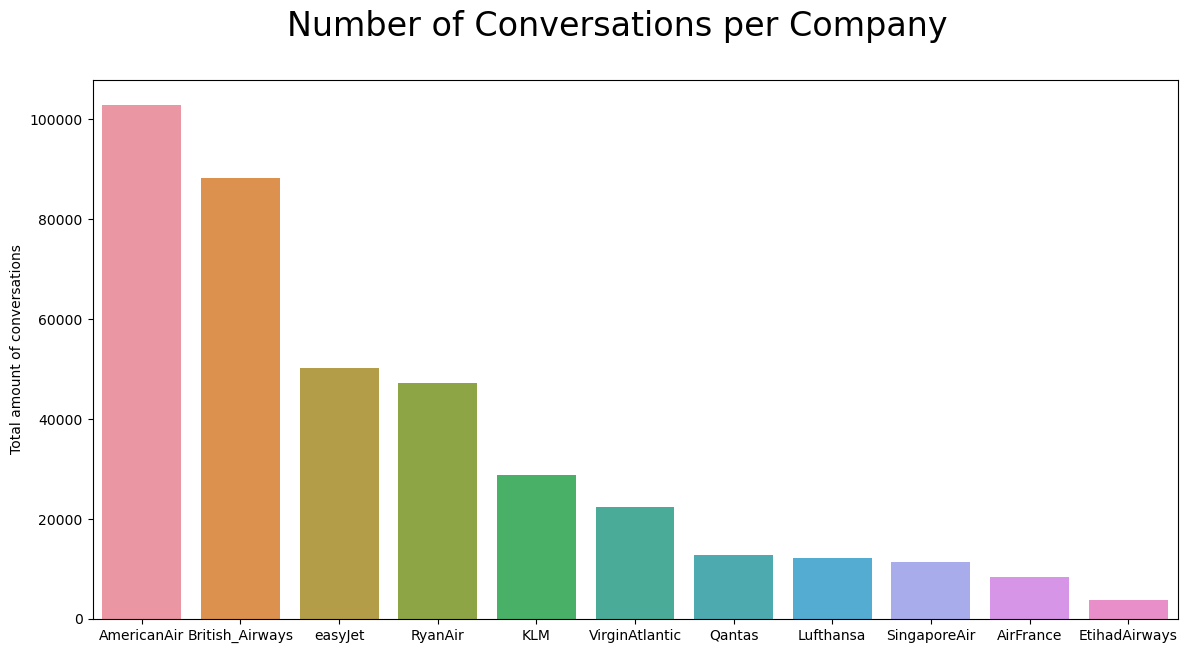

In [6]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(14,7))

sns.barplot(data=conv_per_airline_df, ax=ax, x='company_name', y='conv_id')

ax.set_ylabel('Total amount of conversations')
ax.set_xlabel(' ')

fig.suptitle('Number of Conversations per Company', size=24);

# fig.get_figure().savefig('number_of_conv_per_company.png')

## How many tweets per conversation

In [7]:
df

def company_naming(id):
    if id == 56377143:
       return 'KLM'
    elif id == 18332190:
       return 'British_Airways'
    elif id == 106062176:
       return 'AirFrance'
    elif id == 22536055:
       return 'AmericanAir'
    elif id == 124476322:
       return 'Lufthansa'
    elif id == 26223583:
       return 'AirBerlin'
    elif id == 2182373406:
       return 'AirBerlin assist'
    elif id == 38676903:
       return 'easyJet'
    elif id == 1542862735:
       return 'RyanAir'
    elif id == 253340062:
       return 'SingaporeAir'
    elif id == 218730857:
       return 'Qantas'
    elif id == 45621423:
       return 'EtihadAirways'
    elif id == 20626359:
       return 'VirginAtlantic'
    else:
       return None
    

df['company_name'] = df['for_airline_id'].apply(lambda row: company_naming(row))

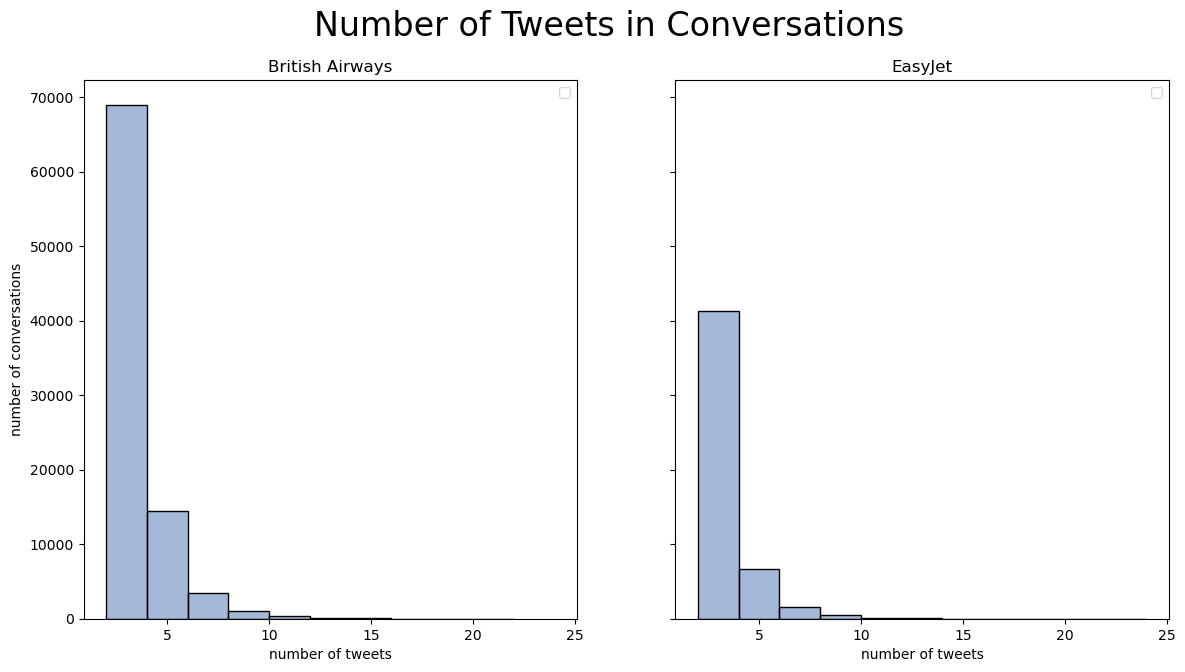

In [9]:
tweets_for_BA_df = df[(df['company_name'] == 'British_Airways')].groupby(['conv_id']).count()[['text']]
tweets_for_EJ_df = df[(df['company_name'] == 'easyJet')].groupby(['conv_id']).count()[['text']]

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14,7), sharex=True, sharey=True)

sns.histplot(tweets_for_BA_df, ax=ax[0], binwidth=2, palette='deep')
sns.histplot(tweets_for_EJ_df, ax=ax[1], binwidth=2, palette='deep')

ax[0].set_title('British Airways')
ax[1].set_title('EasyJet')

ax[0].set_xlabel('number of tweets')
ax[1].set_xlabel('number of tweets')
ax[1].set_ylabel('number of conversations')
ax[0].set_ylabel('number of conversations')

ax[0].legend('')
ax[1].legend('')

fig.suptitle('Number of Tweets in Conversations', size=24);

# fig.get_figure().savefig('number_of_tweets_in_conv.png')